# Epsilon-Greedy Bandit
A demo of the multi-armed bandit problem with an epsilon-greed exploration algorithm. The bandit is simulated through sampling a gaussian distribution.

In [1]:
# All the imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Multi-armed Bandit

In [2]:
class Bandit():
    # Simulates sampling from a bandit
    
    def __init__(self,mean):
        # Create a bandit with the given true mean
        self.mean = mean
        self.estimated_mean = 0
        self.sample_number = 0
        self.current_sample = 0
        
    def pull(self):
        # Simulates the action of pulling the arm of a bandit
        self.current_sample = self.mean + np.random.randn()
        self.sample_number += 1
        return self.current_sample
    
    def calculate_mean(self):
        # Calculates the mean up to the current point
        if(self.sample_number < 1):
            raise Exception("No samples have been acquired.")
                
        self.estimated_mean = (1/self.sample_number)*self.current_sample + (1 - 1/self.sample_number)*self.estimated_mean
        
        return self.estimated_mean
        
    def sample_bandit(self):
        # Obtains a new sample from the bandit by pulling from the sample
        # and updating the mean. Returns the estimated mean
        self.pull()
        return self.calculate_mean()
    
    def get_estimated_mean(self):
        return self.estimated_mean
        

## Epsilon-Greedy algorithm

In [3]:
class EpsilonGreedy():
    # Performs the computations of the epsilon-greed algorithm
    
    def __init__(self,epsilon,bandits):
        self.epsilon = epsilon # Exploration rate
        self.bandits = bandits # A list of bandits to be sampled
        self.bandit_means = np.zeros(len(bandits)) # The observed means
        self.cumulative_mean = 0
        
    def update(self):
        # Samples all the bandits in the list
        if(len(bandits) < 2):
            raise Exception("The number of bandits should be greater than 1.")
        
        bandit_number = 0
        # Choose whether to sample a random bandit or the best so far
        if(np.random.random_sample() < self.epsilon):
            #bandit_number = np.random.randint(0, len(bandits)) # Random selection  
            bandit_number = np.random.choice(len(bandits))
        else:
            bandit_number = np.argmax(self.bandit_means) # The current best
            
        # Now sample the bandit
        sampled_mean = self.bandits[bandit_number].sample_bandit()
        self.cumulative_mean += sampled_mean
        self.bandit_means[bandit_number] = sampled_mean
        
        return np.argmax(self.bandit_means) # The current best
    
    def get_best_bandit(self):
        return np.argmax(self.bandit_means) # The current best
    
    def get_best_mean_estimate(self):
        return self.bandit_means[np.argmax(self.bandit_means)]
    
    def get_cumulative_mean(self):
        return self.cumulative_mean
    
    def get_result(self):
        message = "I think the best bandit is bandit #" + str(self.get_best_bandit()) + " with a mean of " + str(self.get_best_mean_estimate())
        print(message)

## Now let's test it out!

In [4]:
# First create bandits
bandits = [Bandit(mean=1), Bandit(mean=2), Bandit(mean=3), Bandit(mean=4), Bandit(mean=5)]

In [5]:
# Now create the eg-algorithm
eg = EpsilonGreedy(epsilon=0.05,bandits=bandits)

I think the best bandit is bandit #4 with a mean of 4.988453093048155


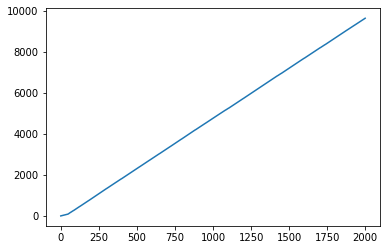

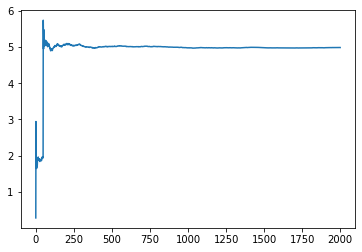

In [6]:
# Now run it for a while and see what the best is
sample_size = 2000
cumulative_mean = np.zeros(sample_size)
best_mean_estimate = np.zeros(sample_size)
for num in range(sample_size):
    eg.update()
    cumulative_mean[num] = eg.get_cumulative_mean()
    best_mean_estimate[num] = eg.get_best_mean_estimate()

eg.get_result()
plt.figure()
plt.plot(cumulative_mean)
plt.figure()
plt.plot(best_mean_estimate)

## Optimistic Greedy
Uses optimistic initial values

In [7]:
class OptimisticGreedy(EpsilonGreedy):
    
    def __init__(self,upper_limit,bandits):
        self.upper_limit = upper_limit # Exploration rate
        self.bandits = bandits # A list of bandits to be sampled
        self.bandit_means = upper_limit*np.ones(len(bandits)) # The observed means
        self.cumulative_mean = 0
        
    def update(self):
        # Samples all the bandits in the list
        if(len(bandits) < 2):
            raise Exception("The number of bandits should be greater than 1.")
        
        # Choose the current best to sample
        bandit_number = np.argmax(self.bandit_means) # The current best
            
        # Now sample the bandit
        sampled_mean = self.bandits[bandit_number].sample_bandit()
        self.cumulative_mean += sampled_mean
        self.bandit_means[bandit_number] = sampled_mean
        
        return np.argmax(self.bandit_means) # The current best

In [8]:
# Now create the eg-algorithm
og = OptimisticGreedy(upper_limit=6,bandits=bandits)

I think the best bandit is bandit #4 with a mean of 4.977224107545419


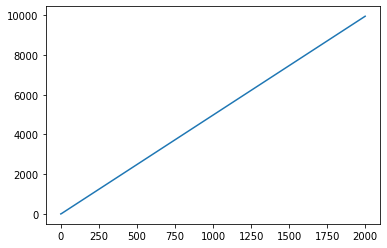

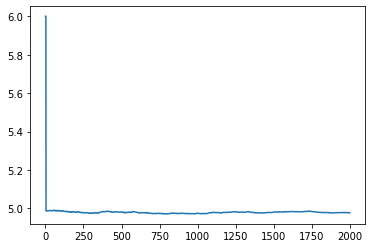

In [9]:
# Now run it for a while and see what the best is
sample_size = 2000
cumulative_mean = np.zeros(sample_size)
best_mean_estimate = np.zeros(sample_size)
for num in range(sample_size):
    og.update()
    cumulative_mean[num] = og.get_cumulative_mean()
    best_mean_estimate[num] = og.get_best_mean_estimate()

og.get_result()
plt.figure()
plt.plot(cumulative_mean)
plt.figure()
plt.plot(best_mean_estimate)